In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math,copy


step 1: first read about dataframe 
step 2: identify the pattern of dataframe features
step 3: extract X and Y values for prediction 
step 4: apply sklearn model of SDGRegreesion or GRADIENT DESCENT with cost function of RMS.

### Load the data set

In [ ]:
df=pd.read_csv("test.csv")
# the
x=df[['beds', 'baths', 'size', 'zip_code']]
# optimizing the pricce table with other tables in csv
df["price"]=df["price"]/1000
# the priditing value should be of y value

y=df["price"]

# sperating x and y values based on test and train set
X_train,x_test,y_train,y_test=train_test_split(x.values,y.values,test_size=30,random_state=40)
# feature table of x 
X_features = ['beds', 'baths', 'size', 'zip_code']

In [ ]:
# checking the null value in dataset
df.isnull().sum()

beds               0
baths              0
size               0
size_units         0
lot_size          77
lot_size_units    77
zip_code           0
price              0
dtype: int64

In [ ]:
# class for scaling data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[   8.    6. 5763.   98.]
Peak to Peak range by column in Normalized X:[6.5532243  5.93889854 6.28460935 3.91322728]


In [ ]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 35, number of weight updates: 16626.0


In [ ]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [-138.06019743  116.52747972  469.17405347  -30.06781291], b:[978.51718644]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


In [ ]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n using dot {y_pred[:4]}\n using sgdr {y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
 using dot [1592.59544248  474.32967207 1587.32842205  953.00782389]
 using sgdr [1592.59544248  474.32967207 1587.32842205  953.00782389]
Target values 
[1750.  500. 1175.  680.]


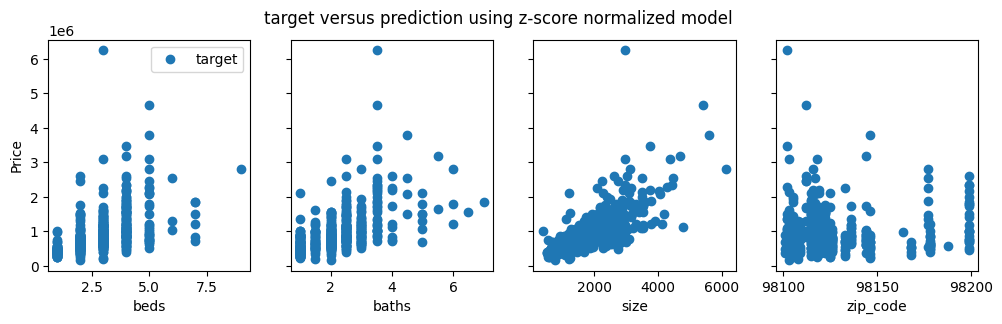

In [ ]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    # ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [ ]:
def predict(x, w, b): 
    """
    single predict using linear regressioN"""
    p = np.dot(x, w) + b     
    return p    

def compute_cost(X, y, w, b): 
    """
    compute cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Return
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100:      # prevent resource exhaustion 
            # print(f"cost is {cost_function(X, y, w, b)}")
            J_history.append(cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing


In [ ]:
"""whole process from above"""

# Initialize parameters
initial_w = [-138.06019743,  116.52747972,  469.17405347,  -30.06781291]
initial_b = 1078.51718644

# Some gradient descent settings
iterations = 35
alpha = np.random.randint(low=0.1,high=1)  # Experiment with different values

# Run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_norm, y_train, initial_w, initial_b,
                                            compute_cost, compute_gradient, 
                                            alpha, iterations)

# Print final results
print(f"Final parameters: b = {b_final:.2f}, w = {w_final}")
print(f"Final cost: {J_hist[-1]:.2f}")
m,_ = X_norm.shape


Iteration    0: Cost 88211.74   
Iteration 1000: Cost 88211.74   
Iteration 2000: Cost 88211.74   
Iteration 3000: Cost 88211.74   
Iteration 4000: Cost 88211.74   
Iteration 5000: Cost 88211.74   
Iteration 6000: Cost 88211.74   
Iteration 7000: Cost 88211.74   
Iteration 8000: Cost 88211.74   
Iteration 9000: Cost 88211.74   
Final parameters: b = 1078.52, w = [-138.06019743  116.52747972  469.17405347  -30.06781291]
Final cost: 88211.74


In [ ]:
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n using dot {y_pred[:4]}\n using sgdr {y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
 using dot [1592.59544248  474.32967207 1587.32842205  953.00782389]
 using sgdr [1592.59544248  474.32967207 1587.32842205  953.00782389]
Target values 
[1750.  500. 1175.  680.]
